[*********************100%***********************]  3 of 3 completed


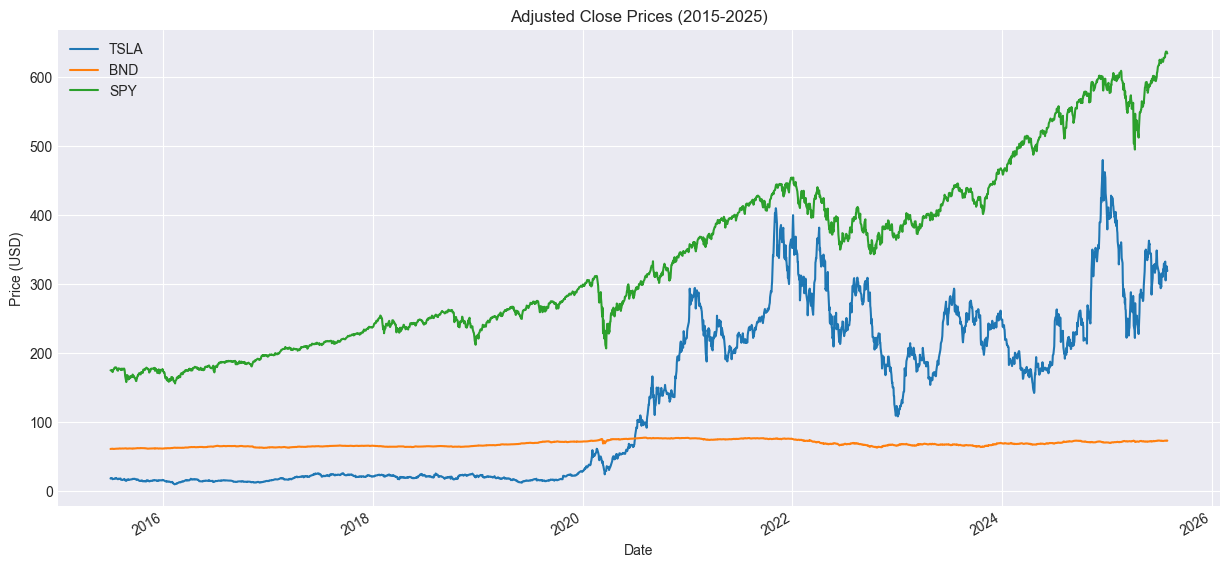

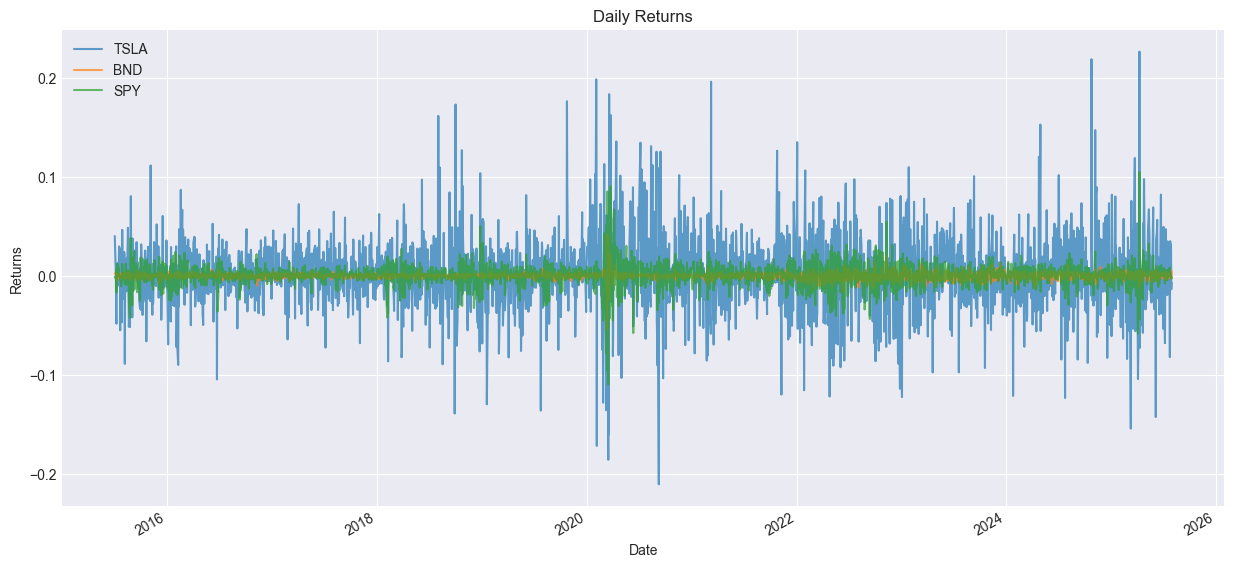

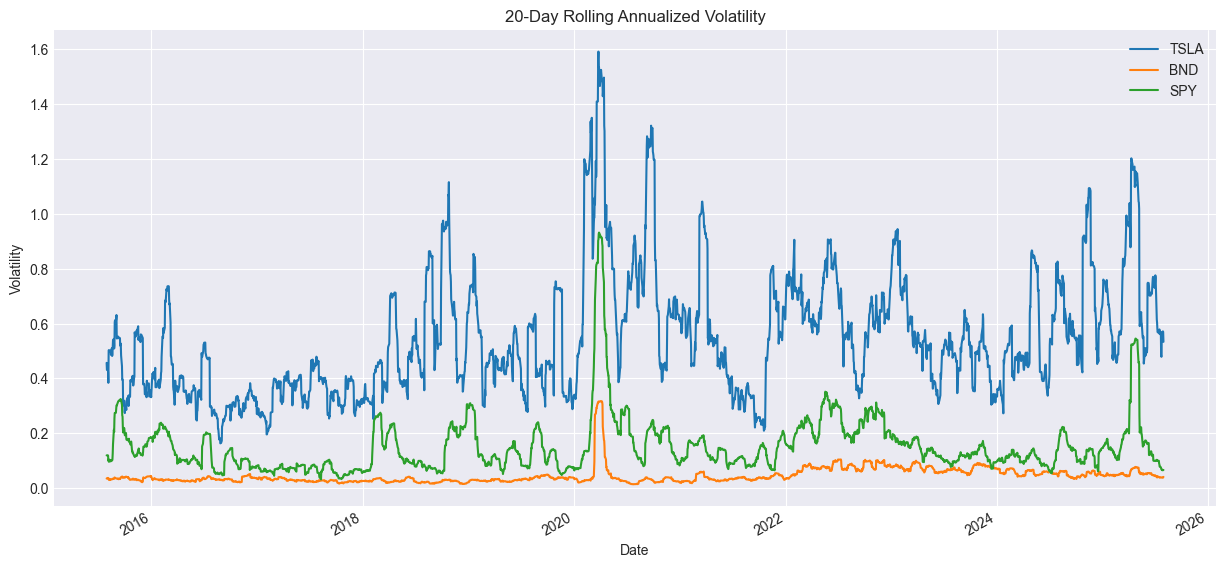


--- ADF Test for 'TSLA Closing Price' ---
ADF Statistic: -1.418872
p-value: 0.573196
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Result: The 'TSLA Closing Price' series is likely non-stationary.

--- ADF Test for 'TSLA Daily Returns' ---
ADF Statistic: -34.681090
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Result: The 'TSLA Daily Returns' series is likely stationary.

--- Foundational Risk Metrics (Historical) ---

Annualized Returns:
 Adj Close_TSLA    0.460690
Adj Close_BND     0.019599
Adj Close_SPY     0.144844
dtype: float64

Annualized Volatility:
 Adj Close_TSLA    0.591887
Adj Close_BND     0.054919
Adj Close_SPY     0.182407
dtype: float64

Sharpe Ratio (Risk-adjusted Return):
 Adj Close_TSLA    0.744550
Adj Close_BND    -0.007295
Adj Close_SPY     0.684427
dtype: float64

Value at Risk (VaR) at 95% confidence level:
 Adj Close_TSLA   -0.054663
Adj Close_BND    -0.004899
Adj Close_SPY    -0.017195
Name: 0.05, dtype: float64

--- Task 1 Co

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

plt.style.use('seaborn-v0_8-darkgrid')

tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-07-01"
end_date = "2025-07-31"

try:
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)
except Exception as e:
    exit()

data.columns = ['_'.join(col).strip() for col in data.columns.values]

data.ffill(inplace=True)

adj_close_data = data[['Adj Close_TSLA', 'Adj Close_BND', 'Adj Close_SPY']]

returns = adj_close_data.pct_change().dropna()

plt.figure(figsize=(15, 7))
adj_close_data.plot(ax=plt.gca())
plt.title('Adjusted Close Prices (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(['TSLA', 'BND', 'SPY'])
plt.show()

plt.figure(figsize=(15, 7))
returns.plot(ax=plt.gca(), alpha=0.7)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(['TSLA', 'BND', 'SPY'])
plt.show()

rolling_volatility = returns.rolling(window=20).std() * np.sqrt(252)
plt.figure(figsize=(15, 7))
rolling_volatility.plot(ax=plt.gca())
plt.title('20-Day Rolling Annualized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(['TSLA', 'BND', 'SPY'])
plt.show()

def adf_test(series, name):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"\n--- ADF Test for '{name}' ---")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <= 0.05:
        print(f"Result: The '{name}' series is likely stationary.")
    else:
        print(f"Result: The '{name}' series is likely non-stationary.")

adf_test(adj_close_data['Adj Close_TSLA'], 'TSLA Closing Price')
adf_test(returns['Adj Close_TSLA'], 'TSLA Daily Returns')

risk_free_rate = 0.02
annualized_returns = returns.mean() * 252
annualized_volatility = returns.std() * np.sqrt(252)
sharpe_ratio = (annualized_returns - risk_free_rate) / annualized_volatility
var_95 = returns.quantile(0.05)

print("\n--- Foundational Risk Metrics (Historical) ---")
print("\nAnnualized Returns:\n", annualized_returns)
print("\nAnnualized Volatility:\n", annualized_volatility)
print("\nSharpe Ratio (Risk-adjusted Return):\n", sharpe_ratio)
print("\nValue at Risk (VaR) at 95% confidence level:\n", var_95)

print("\n--- Task  Completed ---")